# Logistic Regression

In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize


Loading the data.

In [32]:
data = pd.read_csv('ex2data1.txt', names=["exam1score", "exam2score", "admission"])


In [33]:
data[0:5]


,exam1score,exam2score,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


seperate feature and target variables and turn them to numpy arrays

In [34]:
X = data.drop('admission', axis=1) # extract feature variable
y = data['admission'] # extract target variable
m = len(y) # how many data-sets 
X = X.as_matrix()
y = y.as_matrix()


Insert column of ones for $\theta_0$ intercept parameter

In [64]:
X = np.insert(X, 0, 1, 1) # insert before index 0, insert 1s on axis 1

Plot the data

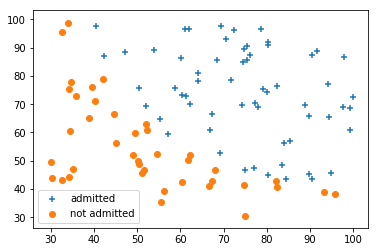

In [65]:
plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='+', label='admitted')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='o', label='not admitted')
plt.legend()


In [129]:
initial_theta = np.zeros(X.shape[1]);

Defining the functions which calculate the cost function and gradient of the cost function for $\vec{\theta}$ values.

In [179]:
def sigmoid(theta, X):
    """
    calcuates sigmoid function 1/(1+e^-(theta^T X))
    """
    thetaT_x = np.matmul(theta, X.transpose())
    return 1/(1 + np.exp(-thetaT_x))


In [214]:
def cost_function(theta, args):
    """
    Calculates the value of the cost function J
    """
    X, y = args
    m = X.shape[0]
    hypothesis = sigmoid(theta, X)
    J = 1/m*np.sum(-y*np.log(hypothesis) - (1-y)*np.log(1-hypothesis))
    return J

def gradient(theta, args):
    """
    Calculates the value of the gradient of the cost 
    function with respect to the theta vector
    """
    X, y = args
    m = X.shape[0]
    hypothesis = sigmoid(theta, X)
    gradient = 1/m*np.sum((hypothesis-y)*X.transpose(), 1)
    return gradient

Finding the value of theta which minimizes the cost function.

In [215]:
result = scipy.optimize.minimize(cost_function, 
x0=initial_theta, 
jac=gradient,
args= [X, y])

theta = result.x

/Users/ajs3g11/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log
/Users/ajs3g11/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


Plotting the decision boundary for the classifier which has been fit to the data.

In [ ]:
x1_plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x2_plot = (-theta[1]*x1_plot - theta[0])/theta[2]

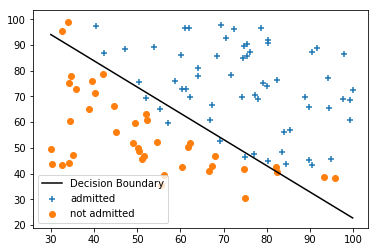

In [217]:
plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='+', label='admitted')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='o', label='not admitted')
plt.plot(x1_plot, x2_plot, 'k-', label='Decision Boundary')
plt.legend()

Predicting the target variable for the training data and quantifying the accuracy of the prediction on the training data.

In [218]:
def predict(theta, X):
    """
    Runs the classifier to predict the target variable
    as Positive or Negative
    """
    y_pred = np.zeros(X.shape[0])
    hypothesis = sigmoid(theta, X)
    y_pred[hypothesis >= 0.5] = 1 # set predicted value to 
    # positive [1] if hypothesis is >= 0.5 (and negative [0] overwise)
    return y_pred

In [208]:
y_pred = predict(theta, X)

amount_correct = np.sum(y_pred == y)/ y.shape[0]

print("Percentage correct: {:.2f}%".format(amount_correct*100))

# Regularised Logistic Regression

In [395]:
data = pd.read_csv('ex2data2.txt', names=["test1_result", "test2_result", "working"])

In [396]:
data[0:5]

,test1_result,test2_result,working
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [397]:
X_original = data.drop('working', axis=1) # extract feature variable
y = data['working'] # extract target variable
m = len(y) # how many data-sets 
X_original = X_original.as_matrix()
y = y.as_matrix()

In [398]:
#X = np.insert(X, 0, 1, 1) # insert before index 0, insert 1s on axis 1

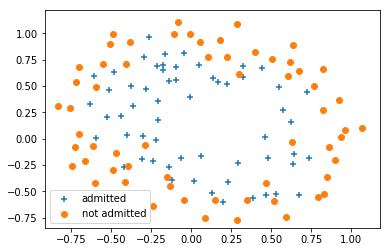

In [433]:
plt.scatter(X_original[y == 1, 0], X_original[y == 1, 1], marker='+', label='admitted')
plt.scatter(X_original[y == 0, 0], X_original[y == 0, 1], marker='o', label='not admitted')
plt.xlim(np.min(X_original[:, 0]*1.1), np.max(X_original[:, 0]*1.1))
plt.ylim(np.min(X_original[:, 1]*1.1), np.max(X_original[:, 1]*1.1))
plt.legend()

mapping features X into X terms for all polynomial terms up to the 6th power and adding columns of ones for $\theta_0$. 

i.e. going from 

X = $\begin{bmatrix} 
x_1 \\ 
x_2 \\
\end{bmatrix}$

to 

X = $\begin{bmatrix} 
1 \\ 
x_1 \\ 
x_2 \\
x_1^2 \\
x_1 x_2 \\
x_2^2 \\
\vdots \\
x_1 x_2^5 \\
x_2^6 \\
\end{bmatrix}$

In [401]:
def map_feature(X, n_power):
    X1 = X[:, 0]
    X2 = X[:, 1]
    X_new = np.ones(X.shape[0])
    for i in range(1, n_power+1):
        for j in range(0, i+1):
            X_new = np.vstack([X_new, X1**(i-j)*X2**(j)])
    X_new = X_new.transpose() # swap rows to columns 
    return X_new

In [402]:
X = map_feature(X_original, 6) 

In [403]:
X.shape

(118, 28)

In [404]:
def cost_function(theta, args):
    """
    Calculates the value of the cost function J
    """
    X, y, lamda = args
    m = X.shape[0]
    hypothesis = sigmoid(theta, X)
    J = 1/m*np.sum(-y*np.log(hypothesis) - (1-y)*np.log(1-hypothesis)) \
    + lamda/(2*m)*np.sum(theta[1:]**2)
    return J

def gradient(theta, args):
    """
    Calculates the value of the gradient of the cost 
    function with respect to the theta vector
    """
    X, y, lamda = args
    m = X.shape[0]
    theta_cut = np.copy(theta)
    theta_cut[0] = 0
    hypothesis = sigmoid(theta, X)
    gradient = 1/m*np.sum((hypothesis-y)*X.transpose(), 1) + lamda/m*theta_cut
    return gradient

In [405]:
initial_theta

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [406]:
initial_theta = np.zeros(X.shape[1]);

lamda = 1
result = scipy.optimize.minimize(cost_function, 
x0=initial_theta, 
jac=gradient,
args= [X, y, lamda])

theta = result.x

In [408]:
y_pred = predict(theta, X)

amount_correct = np.sum(y_pred == y)/ y.shape[0]

print("Percentage correct: {:.2f}%".format(amount_correct*100))

Percentage correct: 83.05%


Solving this complex non-linear equation we have fitted for x2, given the value of x1 is non-trivial, instead we will calculate the values of the predicted y on a x1,x2 grid to find where the decision boundary occurs.

In [424]:
n = 300  # number of point along edge of mesh
# create a mesh to plot in
x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))

X_grid = np.vstack([xx.ravel(), yy.ravel()]) # create feature data for mesh
X_grid = X_grid.transpose() # flip to correct row-column dimensions

X_grid = map_feature(X_grid, 6) # map to higher order polynomial terms

Z = predict(theta, X_grid) # predict target variable on grid

Z = Z.reshape(xx.shape) # reshape to match shape of xx and yy grid 

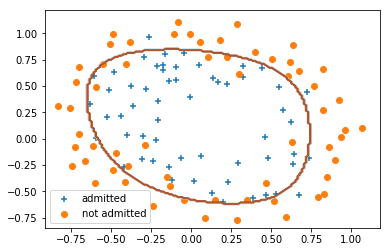

In [434]:
plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='+', label='admitted')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='o', label='not admitted')
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlim(np.min(X_original[:, 0]*1.1), np.max(X_original[:, 0]*1.1))
plt.ylim(np.min(X_original[:, 1]*1.1), np.max(X_original[:, 1]*1.1))
plt.legend()

We can see that this decision boundary seems sensible, neither overfitted nor underfitted.

#### Below we repeat this with $\lambda = 0$ (i.e. no regularisation) and we get a result which is overfit

Percentage correct: 91.53%


/Users/ajs3g11/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


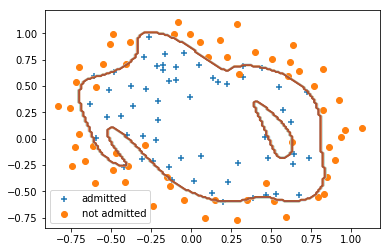

In [435]:
initial_theta = np.zeros(X.shape[1]);

lamda = 0
result = scipy.optimize.minimize(cost_function, 
x0=initial_theta, 
jac=gradient,
args= [X, y, lamda])

theta = result.x

# --------

y_pred = predict(theta, X)

amount_correct = np.sum(y_pred == y)/ y.shape[0]

print("Percentage correct: {:.2f}%".format(amount_correct*100))

# --------

n = 300  # number of point along edge of mesh
# create a mesh to plot in
x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))

X_grid = np.vstack([xx.ravel(), yy.ravel()]) # create feature data for mesh
X_grid = X_grid.transpose() # flip to correct row-column dimensions

X_grid = map_feature(X_grid, 6) # map to higher order polynomial terms

Z = predict(theta, X_grid) # predict target variable on grid

Z = Z.reshape(xx.shape) # reshape to match shape of xx and yy grid 

# --------

plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='+', label='admitted')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='o', label='not admitted')
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlim(np.min(X_original[:, 0]*1.1), np.max(X_original[:, 0]*1.1))
plt.ylim(np.min(X_original[:, 1]*1.1), np.max(X_original[:, 1]*1.1))
plt.legend()


#### Now we repeat this with $\lambda = 100$ and we get a result which is underfit as we have penalised the $\theta$ values too highly.

Percentage correct: 61.02%


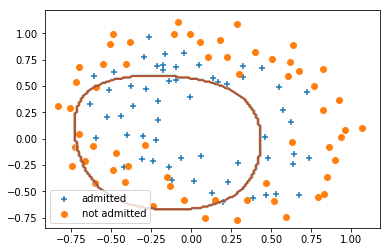

In [437]:
initial_theta = np.zeros(X.shape[1]);

lamda = 100
result = scipy.optimize.minimize(cost_function, 
x0=initial_theta, 
jac=gradient,
args= [X, y, lamda])

theta = result.x

# --------

y_pred = predict(theta, X)

amount_correct = np.sum(y_pred == y)/ y.shape[0]

print("Percentage correct: {:.2f}%".format(amount_correct*100))

# --------

n = 300  # number of point along edge of mesh
# create a mesh to plot in
x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))

X_grid = np.vstack([xx.ravel(), yy.ravel()]) # create feature data for mesh
X_grid = X_grid.transpose() # flip to correct row-column dimensions

X_grid = map_feature(X_grid, 6) # map to higher order polynomial terms

Z = predict(theta, X_grid) # predict target variable on grid

Z = Z.reshape(xx.shape) # reshape to match shape of xx and yy grid 

# --------

plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='+', label='admitted')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='o', label='not admitted')
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlim(np.min(X_original[:, 0]*1.1), np.max(X_original[:, 0]*1.1))
plt.ylim(np.min(X_original[:, 1]*1.1), np.max(X_original[:, 1]*1.1))
plt.legend()